In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix


In [2]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
load(file="../../data/intermediate/cite-seq/seurat-umap.Robj")

In [4]:
my_order <- c('Monocytes', 'Granulocytes', 'Megakaryocytes', 'MPP', 'EEP', 'CEP1', 'CEP2', 'ETD1', 'ETD2', 'ETD3', 'ETD4')

In [5]:
levels(eryp@ident)

[1] "ETD1"           "CEP2"           "ETD2"           "ETD3"          
 [5] "CEP1"           "EEP"            "ETD4"           "MPP"           
 [9] "Monocytes"      "Megakaryocytes" "Granulocytes"

In [6]:
eryp@ident <- factor(x = eryp@ident, levels = my_order)

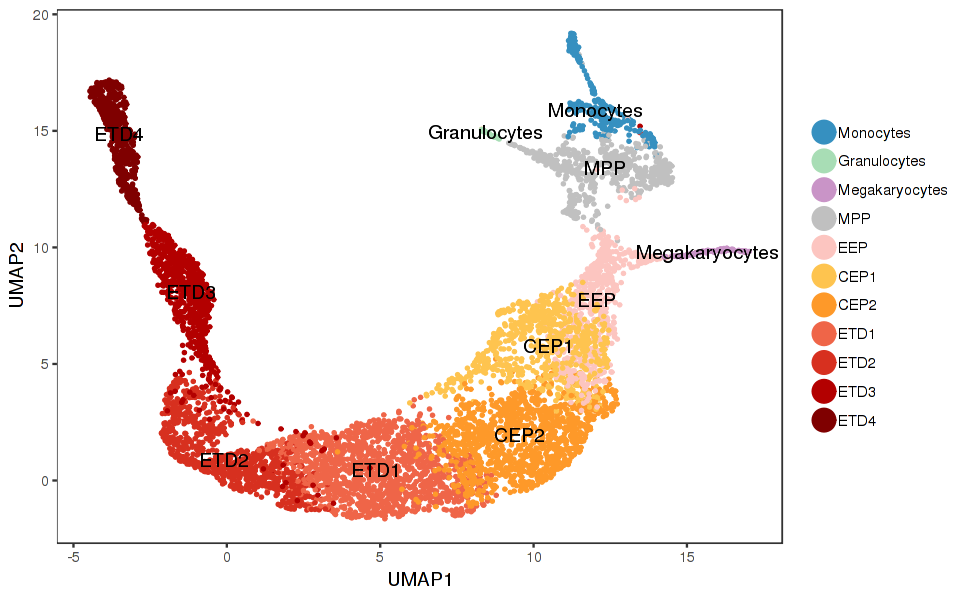

In [7]:
#pdf('../../out/figures/scrna-umap.pdf')

options(repr.plot.width=8, repr.plot.height=5)

DimPlot(eryp, reduction.use = "umap", do.label = TRUE, pt.size = 0.5,
       cols.use=c(
                '#3690c0', #Mono
                '#a8ddb5', #Gran
                '#c994c7', #Meg
                '#c0c0c0', #MPP
                '#fcc5c0', #EEP
                '#fec44f', #CEP1
                '#fe9929', #CEP2
                '#ef6548', #ETD1
                '#d7301f', #ETD3
                '#b30000', #ETD3
                '#7f0000'  #ETD4
       ))

#dev.off()

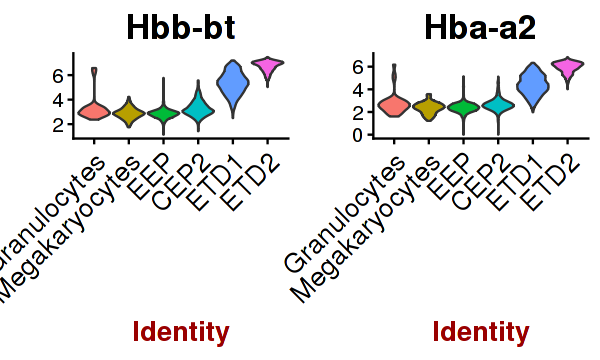

In [38]:
VlnPlot(object = eryp, features.plot = c("Hbb-bt", "Hba-a2"),
       x.lab.rot = TRUE, point.size.use=0,
       ident.include=c('Granulocytes', 'Megakaryocytes', 'EEP', 'CEP2', 'ETD1', 'ETD2'))

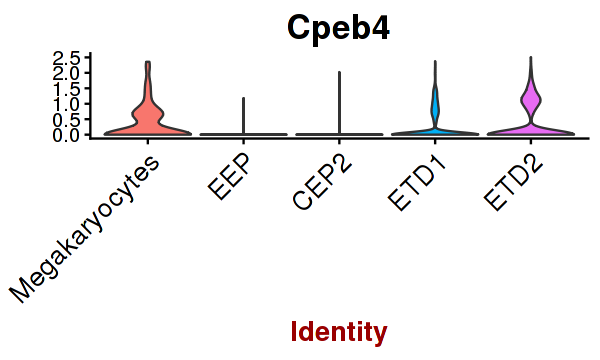

In [23]:
VlnPlot(object = eryp, features.plot = c("Cpeb4"),
       x.lab.rot = TRUE, point.size.use=0,
       ident.include=c('Megakaryocytes', 'EEP', 'CEP2', 'ETD1', 'ETD2'))

In [9]:
cluster.averages <- AverageExpression(eryp)

Finished averaging RNA for cluster Monocytes
Finished averaging RNA for cluster Granulocytes
Finished averaging RNA for cluster Megakaryocytes
Finished averaging RNA for cluster MPP
Finished averaging RNA for cluster EEP
Finished averaging RNA for cluster CEP1
Finished averaging RNA for cluster CEP2
Finished averaging RNA for cluster ETD1
Finished averaging RNA for cluster ETD2
Finished averaging RNA for cluster ETD3
Finished averaging RNA for cluster ETD4


In [24]:
head(cluster.averages)

,Monocytes,Granulocytes,Megakaryocytes,MPP,EEP,CEP1,CEP2,ETD1,ETD2,ETD3,ETD4
Sox17,0.0000000,0.0000000,0.0000000,0.002097154,0.0000000,0.0000000,0.000645021,0.002170213,0.001730959,0.004426832,0.003614976
Mrpl15,1.2651160,0.8370012,1.1883375,1.566794804,2.3769746,2.1536713,2.259171410,1.419401353,0.499489464,0.335715473,0.281601192
Lypla1,0.8156466,1.1629324,0.7333235,0.874176386,0.6471405,0.4638509,0.388046760,0.167906964,0.146929912,0.084328910,0.126740045
Tcea1,0.5248425,0.2843686,0.8413165,0.566001129,0.7279920,0.9380961,0.800934662,0.924609757,0.759455999,0.494872771,0.181065869
Atp6v1h,0.3973127,0.2122202,0.3308107,0.331066033,0.2564560,0.2542472,0.247709274,0.197893832,0.085036938,0.083937977,0.073734490
Rb1cc1,0.2489224,0.3659165,0.2568504,0.279416305,0.2475515,0.2283183,0.203412923,0.290240936,0.443279088,0.706343869,0.041477171


In [10]:
write.csv(cluster.averages, '../../data/processed/cite-seq/seurat_cluster_averages.csv')

In [27]:
svg('../../out/figures/scrna-markers.svg')
FeaturePlot(eryp, features.plot = c("Hlf", "Ngp", "Pf4", "Csf1r", 'Vim', "Hbb-bt"),
            reduction.use = "umap", no.legend = FALSE,
            min.cutoff = "q05", max.cutoff = "q95", nCol=2)
dev.off()

png 
  2

In [33]:
svg('../../out/figures/scrna-cite.svg', width=14, height=3)
options(repr.plot.width=10, repr.plot.height=3)
FeaturePlot(eryp, features.plot = c("CITE_cKit", "CITE_CD71", "CITE_Ter119"),
                        reduction.use = "umap", no.legend = FALSE,
            cols.use = c("gray", "blue"),
            min.cutoff = "q05", max.cutoff = "q95", nCol=3)
dev.off()

png 
  2

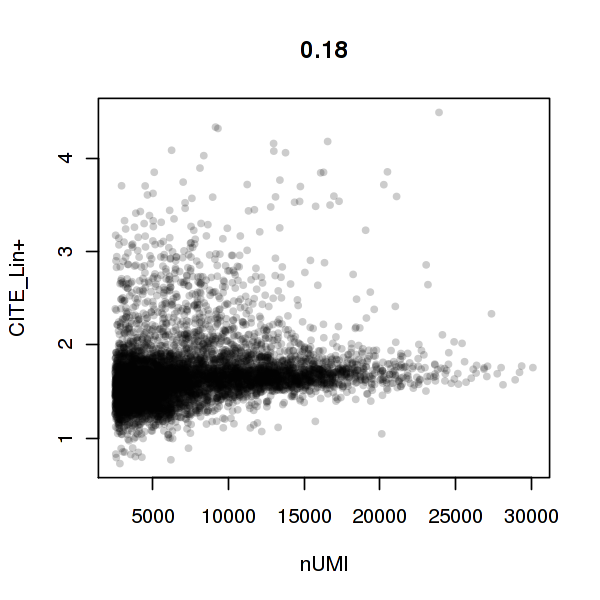

In [16]:
options(repr.plot.width=5, repr.plot.height=5)
GenePlot(eryp,
         gene1="nUMI", gene2="CITE_Lin+", cex=0.75, 
         col.use = rgb(red = 0, green = 0, blue = 0, alpha = 0.2))

In [11]:
lin_pos_cells <- SubsetData(eryp, subset.name="CITE_Lin+", accept.low = 2)
lin_neg_cells <- SubsetData(eryp, subset.name="CITE_Lin+", accept.high = 2)

In [12]:
CD71_low <- 1.6
CD71_medium <- 2.2
Ter119_S1 <- 1.25
Ter119_S2 <- 1.8

In [37]:
svg('../../out/figures/scrna-cd71-ter119.svg', width=5, height=5)

GenePlot(lin_neg_cells,
         gene1="CITE_Ter119", gene2="CITE_CD71", cex=0.75,
         col.use = rgb(red = 0, green = 0, blue = 0, alpha = 0.2))

dev.off()

png 
  2

In [13]:
#genes_to_save <- c('Hba-a1', 'Hba-a2', 'Cpeb4')

save_gene_expression_matrix <- function(input_data, file){
    gene_mat <- as.matrix(input_data@raw.data[
        #match(genes_to_save, row.names(input_data@raw.data))
        ,
        match(colnames(input_data@data), colnames(input_data@raw.data))])
    write.csv(gene_mat, file)
    #return(gene_mat)
}

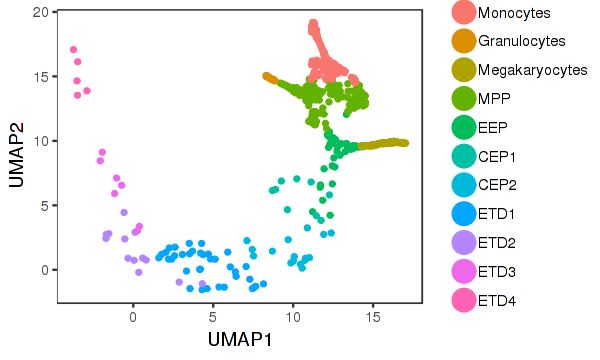

In [14]:
options(repr.plot.width=5, repr.plot.height=3)
DimPlot(object = lin_pos_cells, reduction.use = "umap")

save_gene_expression_matrix(lin_pos_cells,
                            '../../data/intermediate/cite-seq/lin-pos.csv')

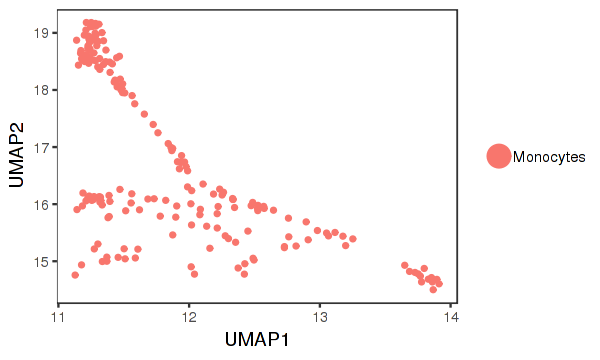

In [35]:
options(repr.plot.width=5, repr.plot.height=3)

lin_mono <- SubsetData(lin_pos_cells, ident.use='Monocytes')

DimPlot(object = lin_mono, reduction.use = "umap")

save_gene_expression_matrix(lin_mono,
                            '../../data/intermediate/cite-seq/lin-pos-mono.csv')

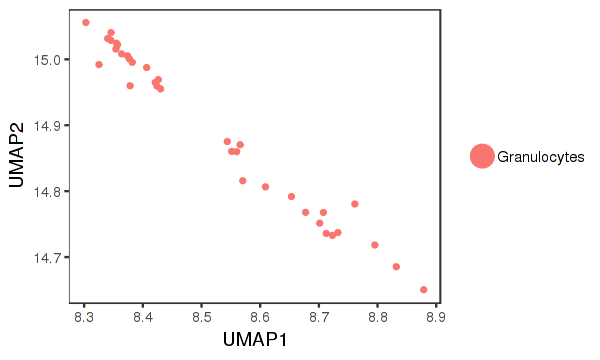

In [36]:
options(repr.plot.width=5, repr.plot.height=3)

lin_gran <- SubsetData(lin_pos_cells, ident.use='Granulocytes')

DimPlot(object = lin_gran, reduction.use = "umap")

save_gene_expression_matrix(lin_gran,
                            '../../data/intermediate/cite-seq/lin-pos-gran.csv')

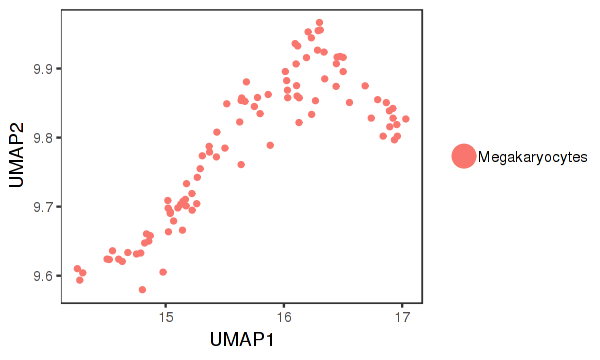

In [37]:
options(repr.plot.width=5, repr.plot.height=3)

lin_meg <- SubsetData(lin_pos_cells, ident.use='Megakaryocytes')

DimPlot(object = lin_meg, reduction.use = "umap")

save_gene_expression_matrix(lin_meg,
                            '../../data/intermediate/cite-seq/lin-pos-meg.csv')

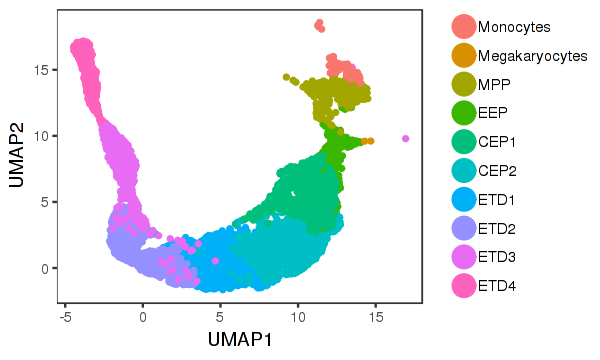

In [124]:
DimPlot(object = lin_neg_cells, reduction.use = "umap")


In [71]:
svg('../../out/figures/scrna-s0-low.svg', width=5, height=3)
S0_low <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71", accept.high = CD71_low),
    subset.name="CITE_Ter119", accept.high=Ter119_S1)

DimPlot(object = S0_low, reduction.use = "umap",
       cols.use=c(
                '#3690c0', #Mono
                '#c994c7', #Meg
                '#c0c0c0', #MPP
                '#fcc5c0', #EEP
                '#fec44f', #CEP1
                '#ef6548', #ETD1
                '#7f0000'  #ETD4
       ))
dev.off()
save_gene_expression_matrix(S0_low,
                            '../../data/intermediate/cite-seq/s0-low.csv')

png 
  2

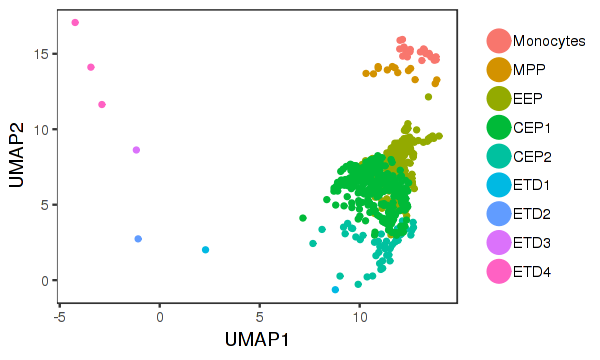

In [126]:
options(repr.plot.width=5, repr.plot.height=3)
S0_medium <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.low = CD71_low, accept.high=CD71_medium),
    subset.name="CITE_Ter119", accept.high=Ter119_S1)

DimPlot(object = S0_medium, reduction.use = "umap")
save_gene_expression_matrix(S0_medium,
                            '../../data/intermediate/cite-seq/s0-med.csv')

In [73]:
svg('../../out/figures/scrna-s1.svg', width=5, height=3)
S1 <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.low = CD71_medium),
    subset.name="CITE_Ter119", accept.high=Ter119_S1)

DimPlot(object = S1, reduction.use = "umap",
       cols.use=c(
                '#3690c0', #Mono
                '#c0c0c0', #MPP
                '#fcc5c0', #EEP
                '#fec44f', #CEP1
                '#fe9929', #CEP2
                '#ef6548', #ETD1
                '#d7301f', #ETD3
                '#b30000', #ETD3
                '#7f0000'  #ETD4
       ))
dev.off()
save_gene_expression_matrix(S1,
                            '../../data/intermediate/cite-seq/s1.csv')

png 
  2

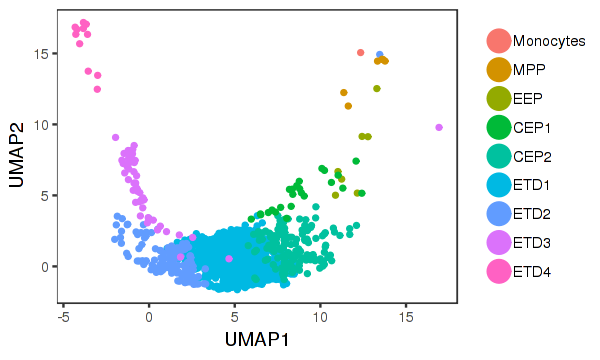

In [128]:
options(repr.plot.width=5, repr.plot.height=3)
S2 <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.low = CD71_medium),
    subset.name="CITE_Ter119", accept.low=Ter119_S1, accept.high=Ter119_S2)

DimPlot(object = S2, reduction.use = "umap")
save_gene_expression_matrix(S2,
                            '../../data/intermediate/cite-seq/s2.csv')

In [76]:
svg('../../out/figures/scrna-s3.svg', width=5, height=3)
S3 <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.low = 2.7),
    subset.name="CITE_Ter119", accept.low=Ter119_S2)

DimPlot(object = S3, reduction.use = "umap",
       cols.use=c(
                '#3690c0', #Mono
                '#c0c0c0', #MPP
                '#fcc5c0', #EEP
                '#fec44f', #CEP1
                '#fe9929', #CEP2
                '#ef6548', #ETD1
                '#d7301f', #ETD3
                '#b30000', #ETD3
                '#7f0000'  #ETD4
       ))
dev.off()
save_gene_expression_matrix(S3,
                            '../../data/intermediate/cite-seq/s3.csv')

png 
  2

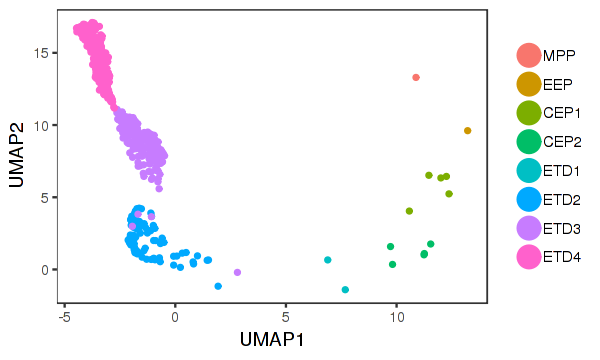

In [130]:
options(repr.plot.width=5, repr.plot.height=3)
S4 <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.low=2.1, accept.high = 2.7),
    subset.name="CITE_Ter119", accept.low=Ter119_S2)

DimPlot(object = S4, reduction.use = "umap")
save_gene_expression_matrix(S4,
                            '../../data/intermediate/cite-seq/s4.csv')

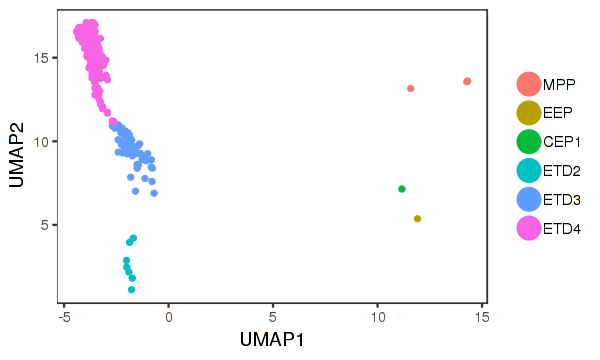

In [131]:
options(repr.plot.width=5, repr.plot.height=3)
S5 <- SubsetData(
    SubsetData(lin_neg_cells, subset.name="CITE_CD71",
               accept.high=2.1),
    subset.name="CITE_Ter119", accept.low=Ter119_S2)

DimPlot(object = S5, reduction.use = "umap")
save_gene_expression_matrix(S5,
                            '../../data/intermediate/cite-seq/s5.csv')

In [132]:
write.csv(colSums(eryp@raw.data), '../../data/intermediate/cite-seq/total_umis.csv')